In [38]:
#type:ignore
import json
from matplotlib import pyplot as plt
import base64
from io import BytesIO

with open('./all_scraped_data.json') as images_data:
    data = json.load(images_data)

In [39]:
images_container = []
for image_path in data:
    images = image_path['image_urls']
    for each_image in images:
        images_container.append(each_image)

In [40]:
#type: ignore
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader

In [41]:
chroma_client  = chromadb.PersistentClient(path='vectorized_db')

In [42]:
# creating collection 
# type:ignore
# import torch

image_loader = ImageLoader()

# device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

image_embedding_fun = OpenCLIPEmbeddingFunction()

db = chroma_client.get_or_create_collection(name='house_plans',embedding_function=image_embedding_fun,data_loader=image_loader)

In [43]:
def convert_image_to_base64(img_data):
    # Convert the image data to a PIL image
    img = plt.imshow(img_data)
    
    # Save the image to a BytesIO object
    buffer = BytesIO()
    img.figure.savefig(buffer, format="png")
    plt.close(img.figure)
    buffer.seek(0)
    
    # Encode the BytesIO object to base64
    img_base64 = base64.b64encode(buffer.getvalue()).decode('utf-8')
    
    return f"data:image/png;base64,{img_base64}"

In [44]:


def print_query_results(query_list: list, query_results: dict) ->None:
    result_count =  len(query_results['ids'][0])
    
    for i in range(len(query_list)):
        print(f"Results for query {query_list[i]}")
        for j in range(result_count):
            id = query_results['ids'][i][j]
            distances = query_results['distances'][i][j]
            metadatas = query_results['metadatas'][i][j]
            documents = query_results['documents'][i][j]
            data = query_results['data'][i][j]
            uris = query_results['uris'][i][j]
            
            print(f"id: {id} \n uris: {uris} \n distance: {distances} ")
            
            plt.imshow(data)
            plt.axis("off")
            plt.show()

In [45]:
def get_query_results_as_base64(query_list: list, query_results: dict) -> list:
    results = []
    result_count = len(query_results['ids'][0])
    
    for i in range(len(query_list)):
        query_result = {"query": query_list[i], "results": []}
        for j in range(result_count):
            id = query_results['ids'][i][j]
            distances = query_results['distances'][i][j]
            metadatas = query_results['metadatas'][i][j]
            documents = query_results['documents'][i][j]
            data = query_results['data'][i][j]
            uris = query_results['uris'][i][j]
            
            img_base64 = convert_image_to_base64(data)
            
            query_result["results"].append({
                "id": id,
                "uri": uris,
                "distance": distances,
                "image_base64": img_base64,
                "metadata": metadatas,
                "document": documents
            })
            
        
        results.append(query_result)
    
    return results

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Results for query A blue house with a chimney
id: 7656 
 uris: houseplan_images/url_981/image_12.jpg 
 distance: 1.4393959045410156 


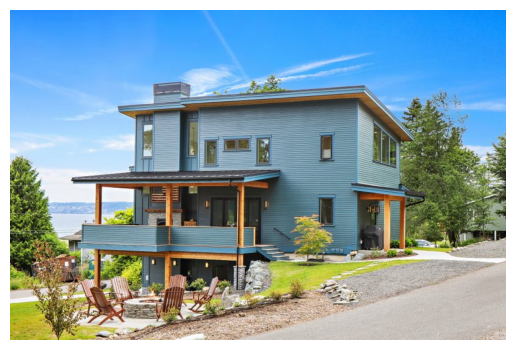

id: 2121 
 uris: houseplan_images/url_232/image_7.jpg 
 distance: 1.4546276330947876 


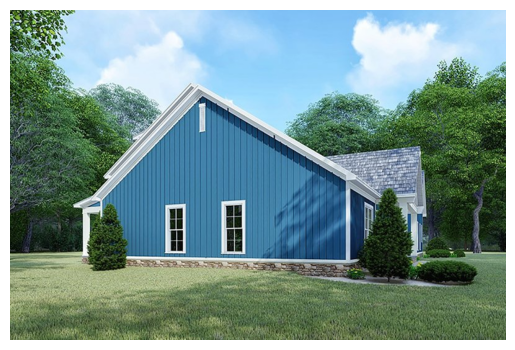

id: 3126 
 uris: houseplan_images/url_390/image_11.jpg 
 distance: 1.4632734060287476 


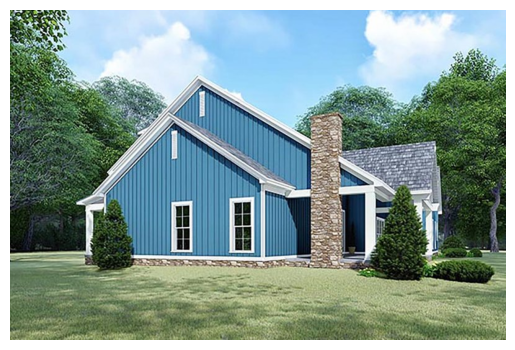

id: 266 
 uris: houseplan_images/url_22/image_12.jpg 
 distance: 1.4641051292419434 


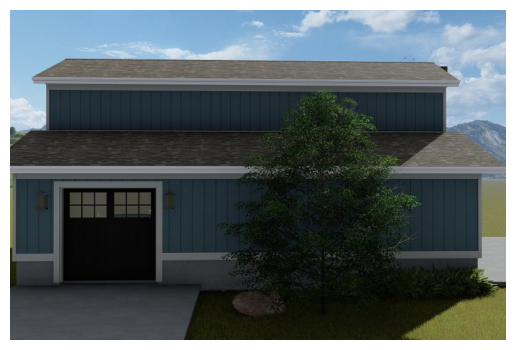

id: 6400 
 uris: houseplan_images/url_843/image_2.jpg 
 distance: 1.468178391456604 


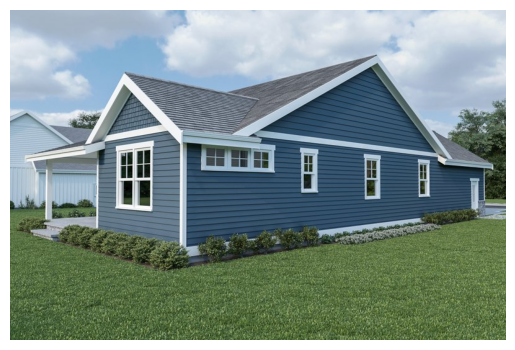

In [46]:
query = ['A blue house with a chimney']
res = db.query(
    query_texts= query,
    n_results=5,
    include=['documents','distances','metadatas','data','uris']
)

print_query_results(query,res)
# get_query_results_as_base64(query,res)
